In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import io
import cv2
import time as times
import torch 
import numpy as np
import xarray as xr
from petrel_client.client import Client
from torch.utils import data as Data
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 自定义 colormap
cmap_custom = mpl.colors.ListedColormap([
    '#555555', '#777777', '#999999', '#BBBBBB', '#EEEEEE', '#663300', '#996666', '#660066',
    '#993399', '#CC00FF', '#CC66CC', '#FFCCFF', '#000099', '#0000CC', '#0000FF', '#3333FF',
    '#3366FF', '#3399FF', '#33CCCC', '#33CCFF', '#6699CC', '#66FFFF', '#339900', '#33CC00',
    '#99CC33', '#33FF00', '#99FF00', '#CCFFCC', '#FFFF00', '#FFFF99', '#FFFFFF', '#FFCC00',
    '#FF9933', '#CC9900', '#CC6600', '#CC3333', '#FF99CC', '#FF00FF', '#FF3399', '#FF0099',
    '#FF6633', '#FF3333', '#FF0000', '#CC0000', '#990000'
]).with_extremes(under='#333333', over='#330000')

In [18]:
# Define the file path and output folder
base_path = "/mnt/petrelfs/xukaiyi/CodeSpace/CasCast_DiT/Experiment/cascast_diffusion_100M/world_size4-Dif_tiny/2024-12-07_18-34-32/test_vis/2024-12-17_23-02-00"
output_folder = base_path + "/visualizations"
os.makedirs(output_folder, exist_ok=True)

# Separate gt and pre files
gt_files = sorted([os.path.join(base_path, f) for f in os.listdir(base_path) if f.startswith('gt_') and f.endswith('.npy')])
pre_files = sorted([os.path.join(base_path, f) for f in os.listdir(base_path) if f.startswith('pre_') and f.endswith('.npy')])

In [20]:
# Summing up the gt and pre arrays
gt_sum = np.zeros(np.load(gt_files[0]).shape)
pre_sum = np.zeros(np.load(pre_files[0]).shape)

# Accumulate values
for gt_file, pre_file in zip(gt_files, pre_files):
    gt_sum += np.load(gt_file)
    pre_sum += np.load(pre_file)

# Compute the difference
diff = gt_sum - pre_sum

# 经纬度范围和网格
lat_min, lat_max = 0, 60   # 纬度范围 (0N-60N)
lon_min, lon_max = 70, 140 # 经度范围 (70E-140E)
lats = np.linspace(lat_min, lat_max, gt_sum.shape[0])
lons = np.linspace(lon_min, lon_max, gt_sum.shape[1])

# Visualization and saving images with map

# plot_with_cartopy(pre_sum, "PRE Sum with Map", os.path.join(output_folder, "pre_sum_with_map.png"))
# plot_with_cartopy(diff, "Difference (GT - PRE) with Map", os.path.join(output_folder, "diff_with_map.png"))

print(gt_sum)
# 计算数据的最小值和最大值
data_min, data_max = gt_sum.min(), gt_sum.max()

print(data_min)
print(data_max)

[[6.55953553e+00 6.20104288e+00 5.92563362e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [7.19826741e+00 6.61624808e+00 5.94211863e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [8.35713173e+00 7.84226973e+00 7.35618198e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [3.67603482e-01 3.03331923e-01 2.76295507e-01 ... 4.45838436e-04
  1.61055364e-02 3.24125784e-02]
 [2.66730349e-01 2.23254926e-01 2.05235307e-01 ... 3.87424836e-04
  1.42665226e-02 2.41098953e-02]
 [2.43115064e-01 2.12235211e-01 1.92290351e-01 ... 9.47201897e-06
  4.85469075e-03 2.52274815e-02]]
0.0
442.07342052459717


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.basemap import Basemap

# 自定义 colormap
cmap = mpl.colors.ListedColormap([
    '#555555', '#777777', '#999999', '#BBBBBB', '#EEEEEE', '#663300', '#996666', '#660066',
    '#993399', '#CC00FF', '#CC66CC', '#FFCCFF', '#000099', '#0000CC', '#0000FF', '#3333FF',
    '#3366FF', '#3399FF', '#33CCCC', '#33CCFF', '#6699CC', '#66FFFF', '#339900', '#33CC00',
    '#99CC33', '#33FF00', '#99FF00', '#CCFFCC', '#FFFF00', '#FFFF99', '#FFFFFF', '#FFCC00',
    '#FF9933', '#CC9900', '#CC6600', '#CC3333', '#FF99CC', '#FF00FF', '#FF3399', '#FF0099',
    '#FF6633', '#FF3333', '#FF0000', '#CC0000', '#990000'
]).with_extremes(under='#333333', over='#330000')

# 定义数值范围 (0-400)
norm = mpl.colors.Normalize(vmin=0, vmax=400)

def visualize_with_basemap(sta_data, lat_data, lon_data, title):
    plt.figure(figsize=(12, 8))

    # 创建 Basemap 对象
    m = Basemap(
        projection='cyl',  # 等距圆柱投影
        llcrnrlat=lat_data.min(), urcrnrlat=lat_data.max(),  # 纬度范围
        llcrnrlon=lon_data.min(), urcrnrlon=lon_data.max(),  # 经度范围
        resolution='i'  # 中等分辨率
    )

    # 绘制地图轮廓
    m.drawcoastlines(linewidth=0.8, color='black')
    m.drawcountries(linewidth=0.8, linestyle='--', color='black')
    m.drawmapboundary(fill_color='white')  # 背景为纯白色

    # 将经纬度数据网格化
    lon_grid, lat_grid = np.meshgrid(lon_data, lat_data)

    # 计算数据的最小值和最大值
    data_min, data_max = sta_data.min(), sta_data.max()

    print(data_min)
    print(data_max)
    
    # 绘制数据图
    im = m.pcolormesh(
        lon_grid, lat_grid, sta_data,
        latlon=True, cmap=cmap, shading='auto',
        vmin=0, vmax=60  # 设置颜色映射范围
    )

    # 添加颜色条
    cbar = plt.colorbar(im, label="Data Values", orientation='vertical', shrink=0.8, pad=0.05)
    cbar.ax.set_ylabel('Prcp Intensity')

    # 添加标题
    plt.title(title)
    plt.xlabel("Longitude (°E)")
    plt.ylabel("Latitude (°N)")

    # 显示图像
    plt.show()

# # 示例数据
# lat_min, lat_max = 0, 60
# lon_min, lon_max = 70, 140
# lat_data = np.linspace(lat_min, lat_max, 1501)  # 纬度数据
# lon_data = np.linspace(lon_min, lon_max, 1751)  # 经度数据

# title1 = '20210726-24h-Target'
# title2 = '20210726-24h-Pred'
# title3 = '20210726-24h-Difference'
# # 调用绘图函数
# visualize_with_basemap(gt_sum, lat_data, lon_data, title1)
# visualize_with_basemap(pre_sum, lat_data, lon_data, title2)
# visualize_with_basemap(diff, lat_data, lon_data, title3)


In [11]:
import numpy as np

# 文件路径
file_path = "/mnt/petrelfs/xukaiyi/CodeSpace/CasCast_DiT/Experiment/cascast_diffusion_100M/world_size4-Dif_tiny/2024-12-07_18-34-32/test_vis/2024-12-17_23-02-00/pre_2021072620.npy"  # 替换为实际文件路径
# 读取 .npy 文件
pre_data = np.load(file_path)
# 文件路径
file_path = "/mnt/petrelfs/xukaiyi/CodeSpace/CasCast_DiT/Experiment/cascast_diffusion_100M/world_size4-Dif_tiny/2024-12-07_18-34-32/test_vis/2024-12-17_23-02-00/gt_2021072620.npy"  # 替换为实际文件路径
# 读取 .npy 文件
gt_data = np.load(file_path)


0.0
61.654873


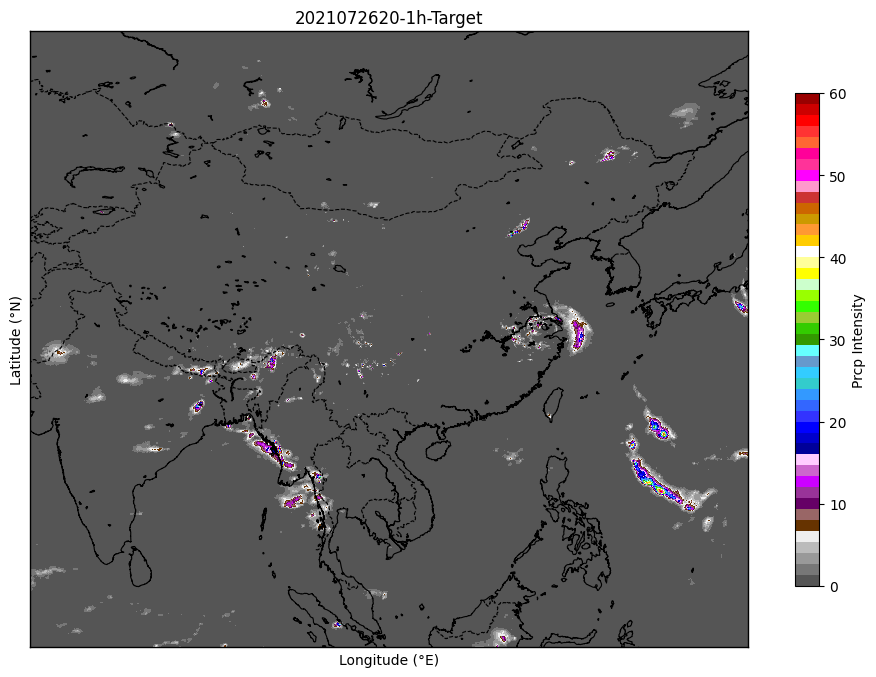

0.0
47.412865


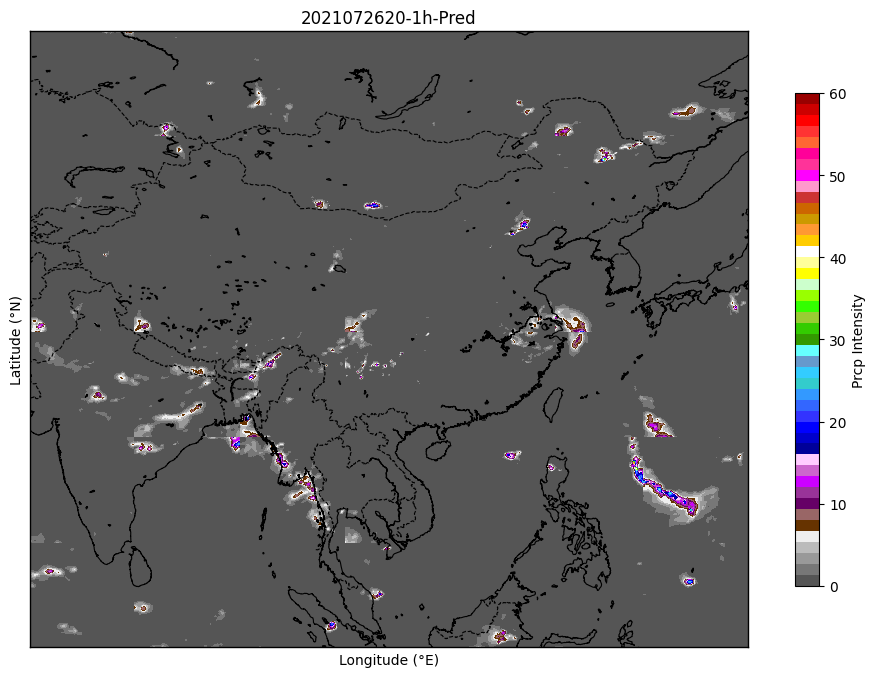

In [12]:
# 示例数据
lat_min, lat_max = 0, 60
lon_min, lon_max = 70, 140
lat_data = np.linspace(lat_min, lat_max, 1501)  # 纬度数据
lon_data = np.linspace(lon_min, lon_max, 1751)  # 经度数据

title1 = '2021072620-1h-Target'
title2 = '2021072620-1h-Pred'

# 调用绘图函数
visualize_with_basemap(gt_data, lat_data, lon_data, title1)
visualize_with_basemap(pre_data, lat_data, lon_data, title2)
# visualize_with_basemap(diff, lat_data, lon_data, title3)

In [7]:
import numpy as np

# 文件路径
file_path = "/mnt/petrelfs/xukaiyi/CodeSpace/cma_mp/Datapath/Datanpy/pre2021070101.npy"  # 替换为实际文件路径
# 读取 .npy 文件
pre_data = np.load(file_path)
# 文件路径
file_path = "/mnt/petrelfs/xukaiyi/CodeSpace/cma_mp/Datapath/Datanpy/qpe2021070100.npy"  # 替换为实际文件路径
# 读取 .npy 文件
gt_data = np.load(file_path)

0.0
41.944153


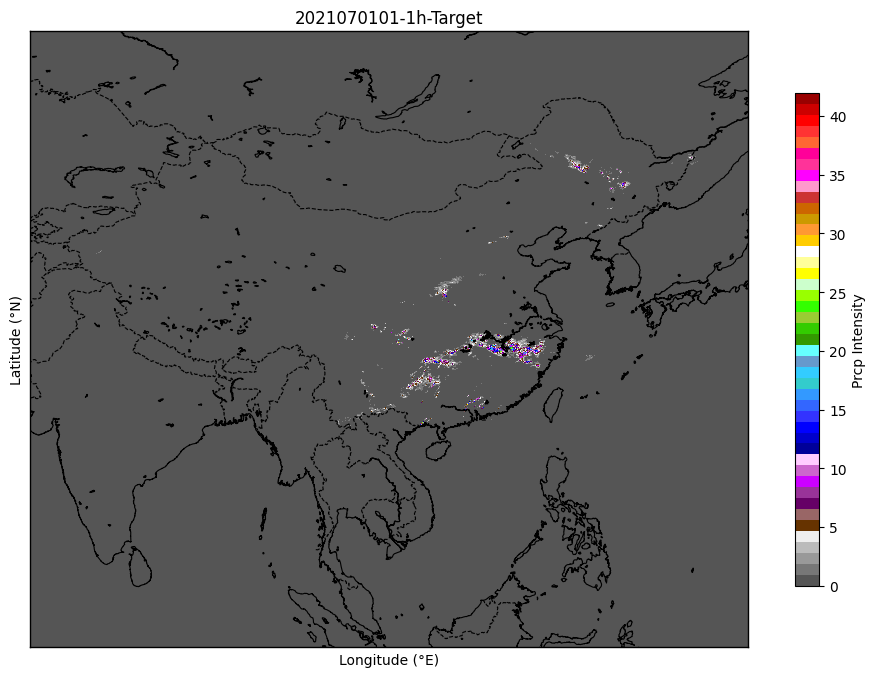

0.0
44.005157


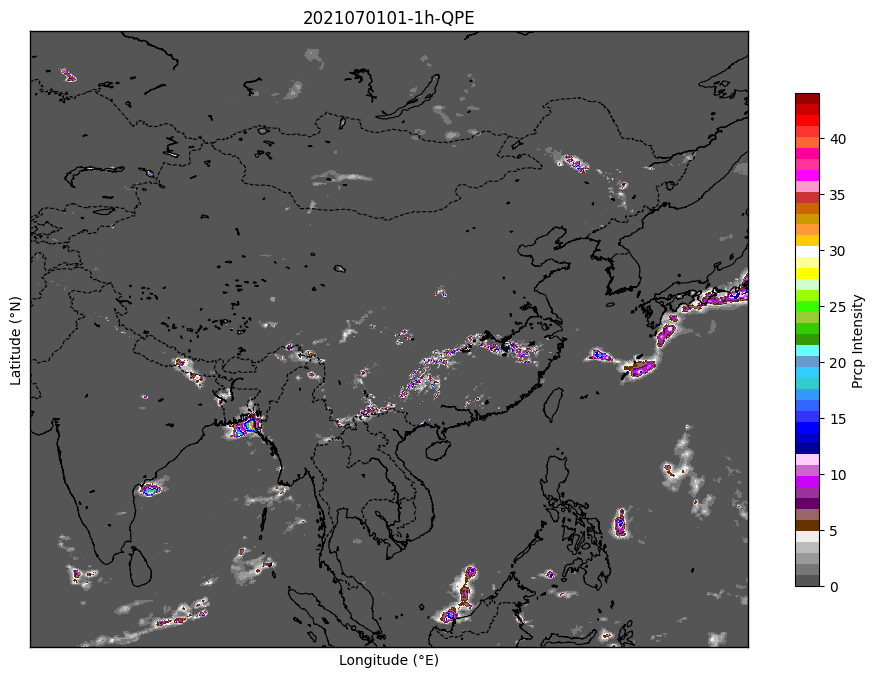

In [10]:
# 示例数据
lat_min, lat_max = 0, 60
lon_min, lon_max = 70, 140
lat_data = np.linspace(lat_min, lat_max, 1501)  # 纬度数据
lon_data = np.linspace(lon_min, lon_max, 1751)  # 经度数据

title1 = '2021070101-1h-Target'
title2 = '2021070101-1h-QPE'

# 调用绘图函数
visualize_with_basemap(gt_data, lat_data, lon_data, title1)
visualize_with_basemap(pre_data, lat_data, lon_data, title2)
# visualize_with_basemap(diff, lat_data, lon_data, title3)

In [9]:
import numpy as np

# 文件路径
file_path = "/mnt/petrelfs/xukaiyi/CodeSpace/CasCast_DiT/saveNpy/pred_2021072620_1280_1536.npy"  # 替换为实际文件路径
# 读取 .npy 文件
pre_data = np.load(file_path)
# 文件路径
file_path = "/mnt/petrelfs/xukaiyi/CodeSpace/CasCast_DiT/saveNpy/gt_2021072620_1280_1536.npy"  # 替换为实际文件路径
# 读取 .npy 文件
gt_data = np.load(file_path)

0.0
61.654873


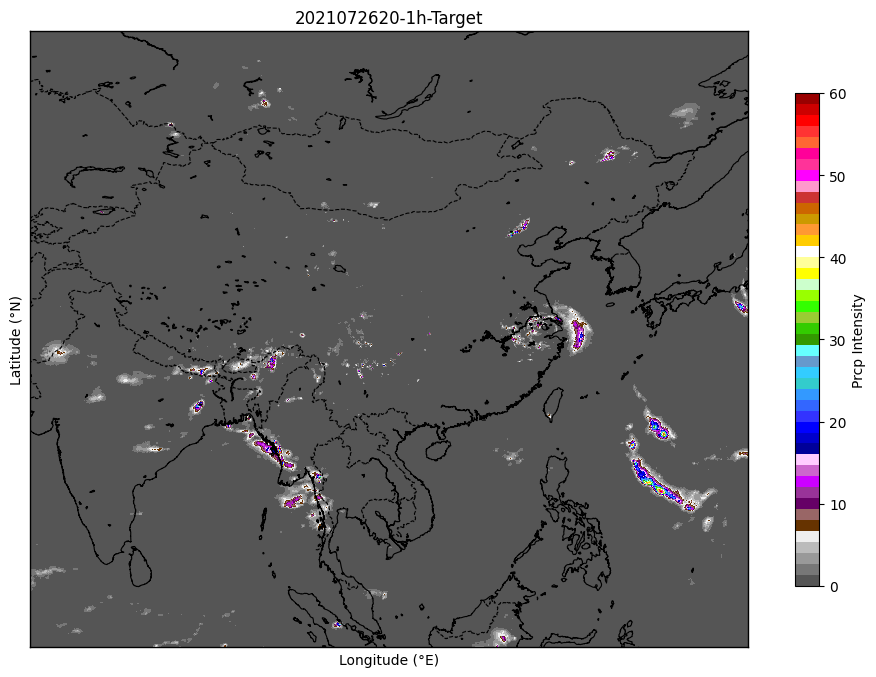

0.0
27.802559


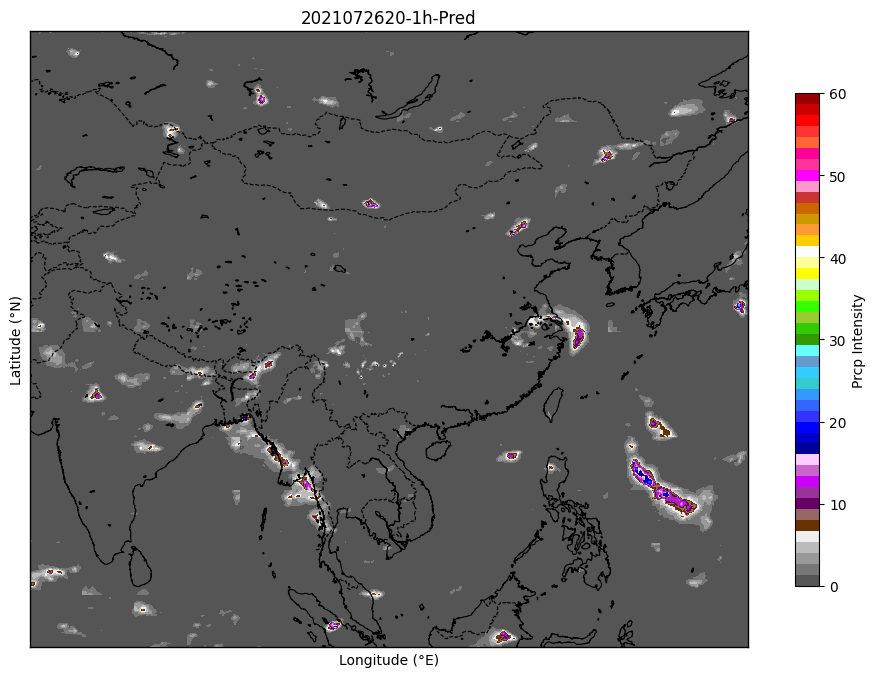

In [10]:
# 示例数据
lat_min, lat_max = 0, 60
lon_min, lon_max = 70, 140
lat_data = np.linspace(lat_min, lat_max, 1501)  # 纬度数据
lon_data = np.linspace(lon_min, lon_max, 1751)  # 经度数据

title1 = '2021072620-1h-Target'
title2 = '2021072620-1h-Pred'

# 调用绘图函数
visualize_with_basemap(gt_data, lat_data, lon_data, title1)
visualize_with_basemap(pre_data, lat_data, lon_data, title2)
# visualize_with_basemap(diff, lat_data, lon_data, title3)

0.0
442.0734


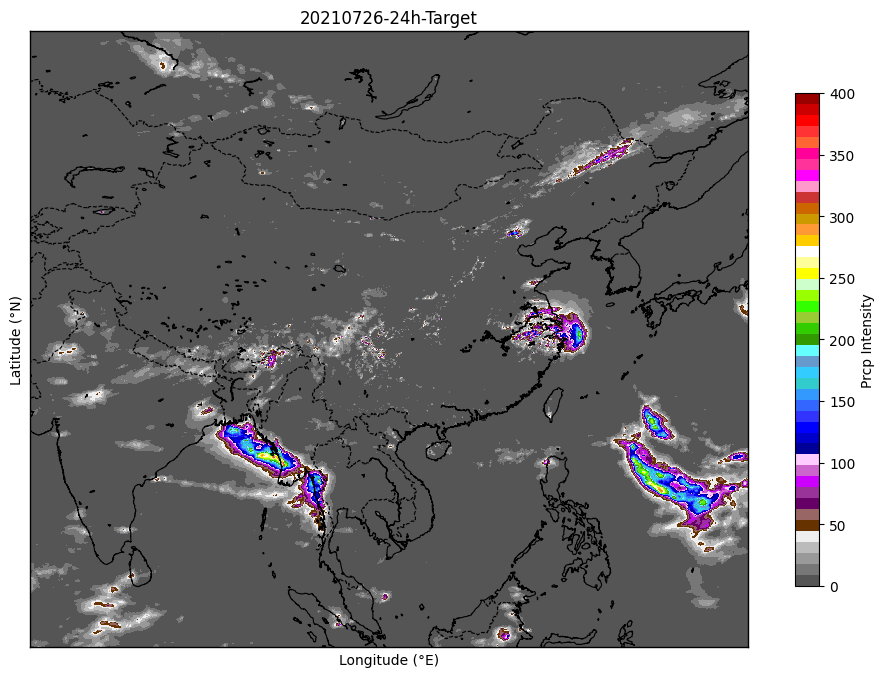

2.215028e-09
239.6382


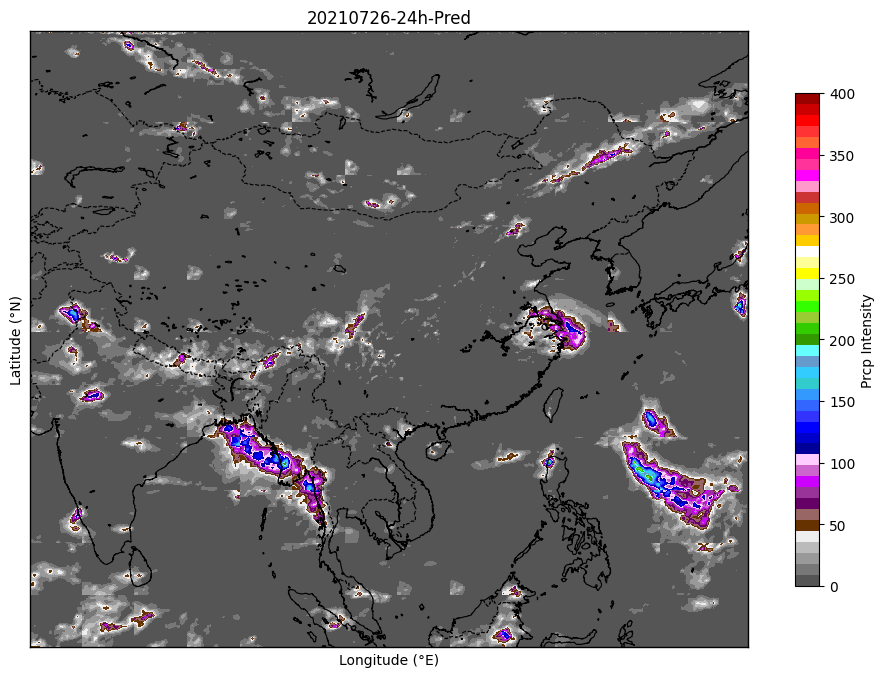

In [7]:
import numpy as np

# 文件路径
file_path = "/mnt/petrelfs/xukaiyi/CodeSpace/CasCast_DiT/saveNpy/saveNpypre_2021072620.npy"  # 替换为实际文件路径
# 读取 .npy 文件
pre_data = np.load(file_path)
# 文件路径
file_path = "/mnt/petrelfs/xukaiyi/CodeSpace/CasCast_DiT/saveNpy/saveNpygt_2021072620.npy"  # 替换为实际文件路径
# 读取 .npy 文件
gt_data = np.load(file_path)

# 示例数据
lat_min, lat_max = 0, 60
lon_min, lon_max = 70, 140
lat_data = np.linspace(lat_min, lat_max, 1501)  # 纬度数据
lon_data = np.linspace(lon_min, lon_max, 1751)  # 经度数据

title1 = '20210726-24h-Target'
title2 = '20210726-24h-Pred'
title3 = '20210726-24h-Difference[Target-Pred]'
# 调用绘图函数
visualize_with_basemap(gt_data, lat_data, lon_data, title1)
visualize_with_basemap(pre_data, lat_data, lon_data, title2)
visualize_with_basemap(gt_data-pre_data, lat_data, lon_data, title3)
# visualize_with_basemap(diff, lat_data, lon_data, title3)


0.0
442.0734


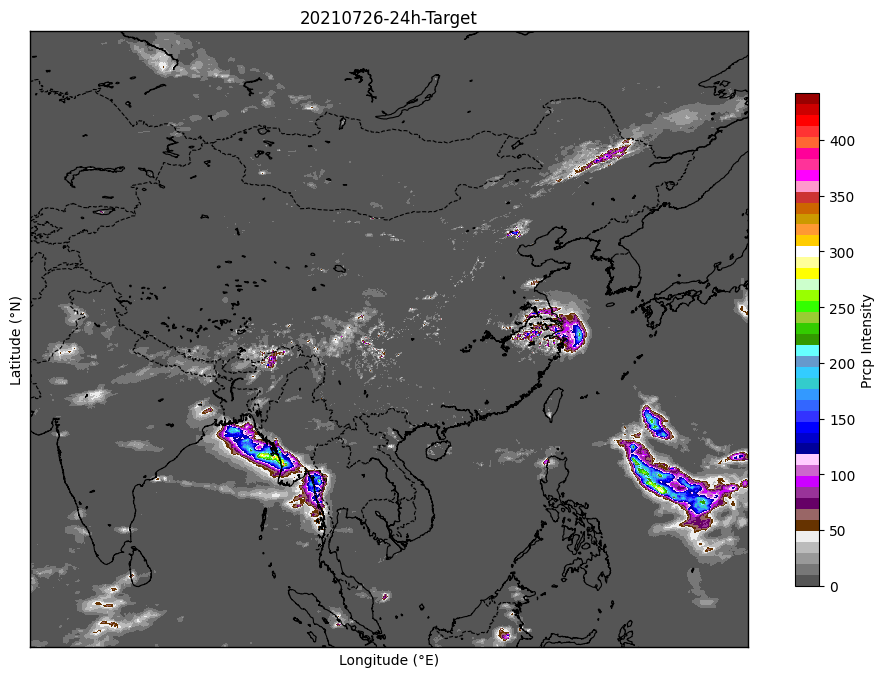

2.215028e-09
239.6382


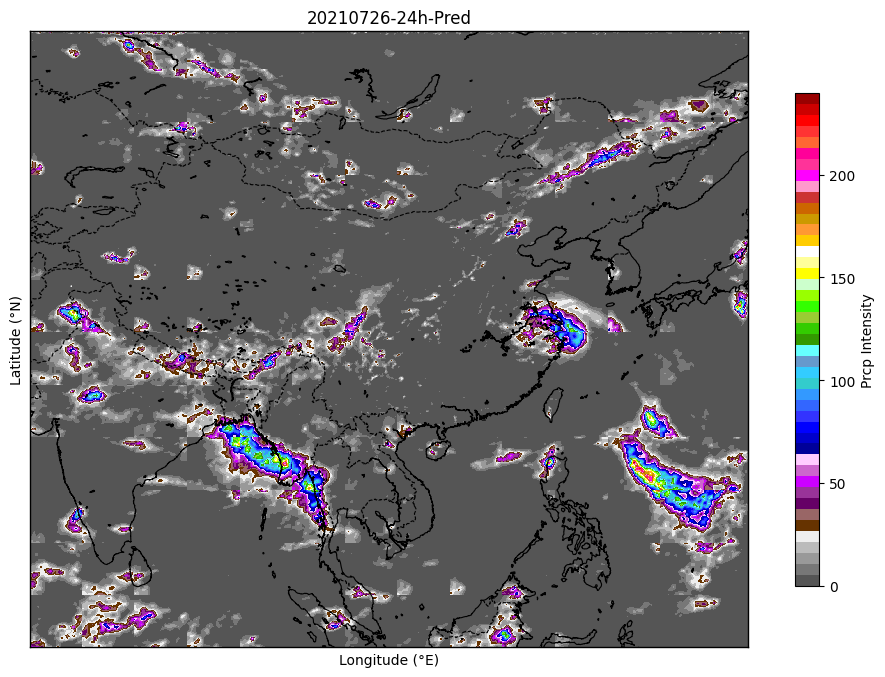

-188.82907
252.8159


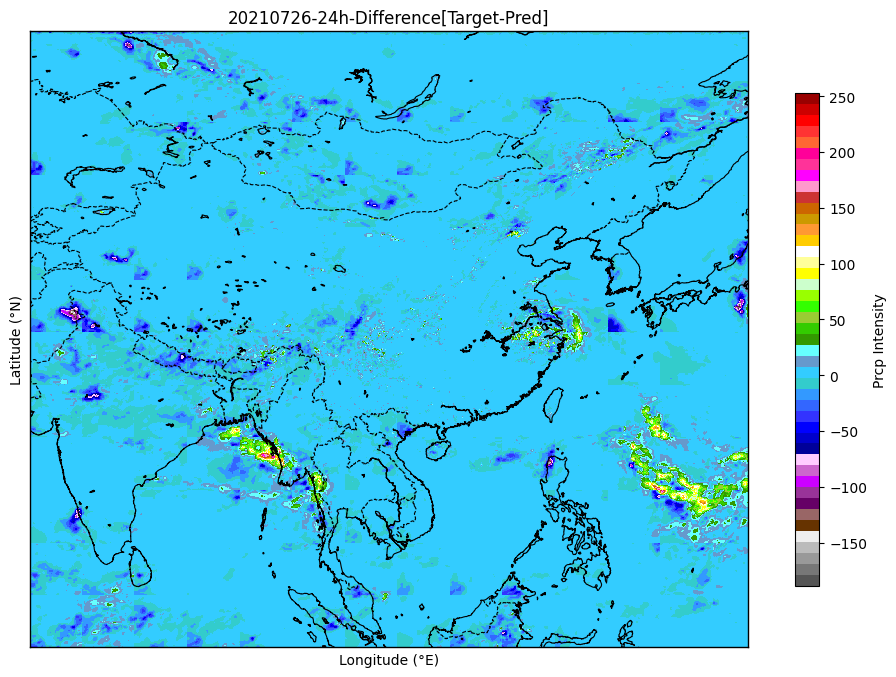

In [5]:
import numpy as np

# 文件路径
file_path = "/mnt/petrelfs/xukaiyi/CodeSpace/CasCast_DiT/saveNpy/saveNpypre_2021072620.npy"  # 替换为实际文件路径
# 读取 .npy 文件
pre_data = np.load(file_path)
# 文件路径
file_path = "/mnt/petrelfs/xukaiyi/CodeSpace/CasCast_DiT/saveNpy/saveNpygt_2021072620.npy"  # 替换为实际文件路径
# 读取 .npy 文件
gt_data = np.load(file_path)

# 示例数据
lat_min, lat_max = 0, 60
lon_min, lon_max = 70, 140
lat_data = np.linspace(lat_min, lat_max, 1501)  # 纬度数据
lon_data = np.linspace(lon_min, lon_max, 1751)  # 经度数据

title1 = '20210726-24h-Target'
title2 = '20210726-24h-Pred'
title3 = '20210726-24h-Difference[Target-Pred]'
# 调用绘图函数
visualize_with_basemap(gt_data, lat_data, lon_data, title1)
visualize_with_basemap(pre_data, lat_data, lon_data, title2)
visualize_with_basemap(gt_data-pre_data, lat_data, lon_data, title3)
# visualize_with_basemap(diff, lat_data, lon_data, title3)


0.0
61.654873


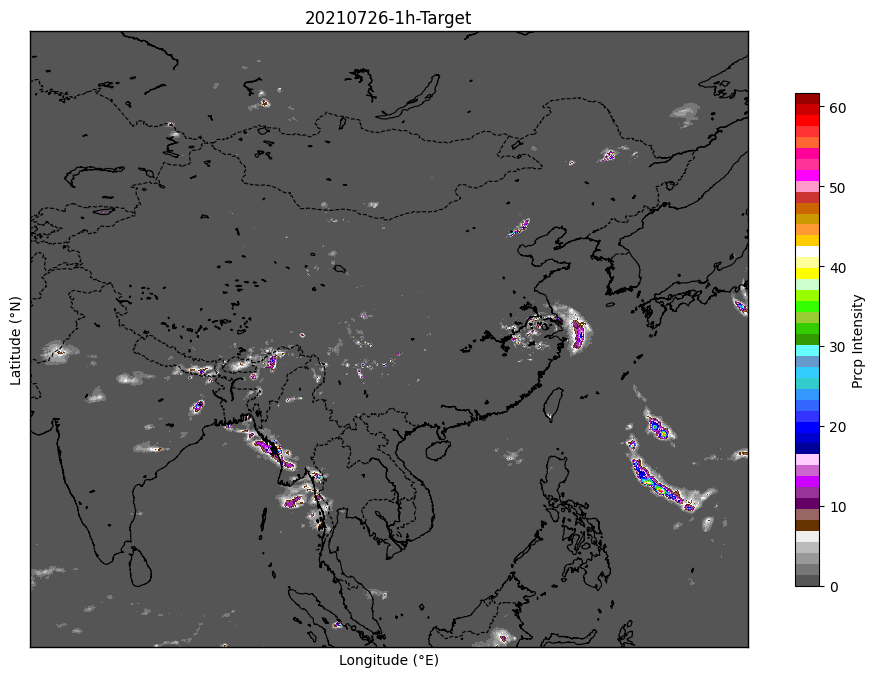

0.0
27.802559


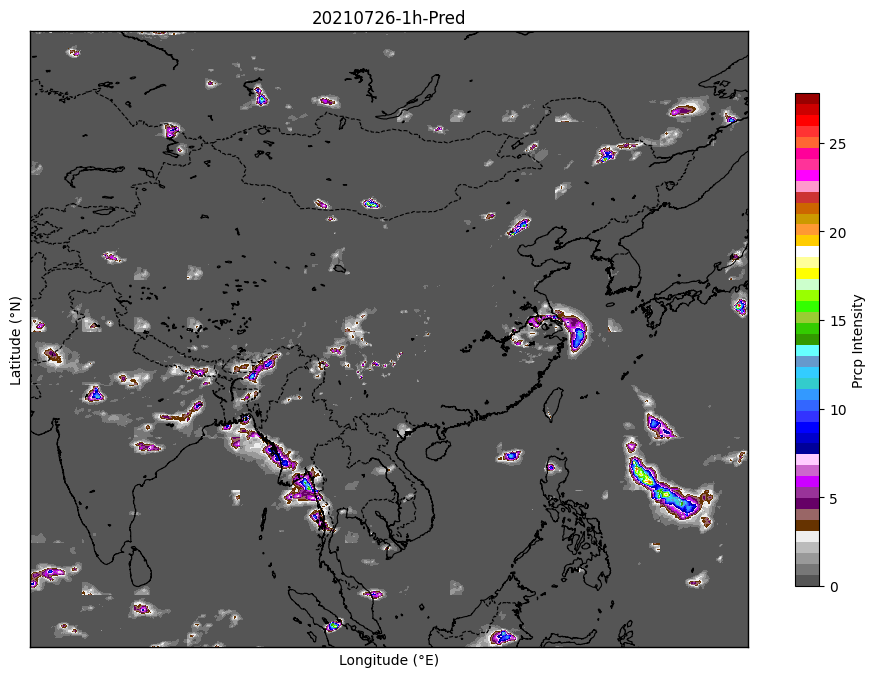

In [5]:
import numpy as np

# 文件路径
file_path = "/mnt/petrelfs/xukaiyi/CodeSpace/DiT/SaveNpy/SaveAll/pred_2021072620.npy"  # 替换为实际文件路径
# 读取 .npy 文件
pre_data = np.load(file_path)
# 文件路径
file_path = "/mnt/petrelfs/xukaiyi/CodeSpace/DiT/SaveNpy/SaveAll/gt_2021072620.npy"  # 替换为实际文件路径
# 读取 .npy 文件
gt_data = np.load(file_path)

# 示例数据
lat_min, lat_max = 0, 60
lon_min, lon_max = 70, 140
lat_data = np.linspace(lat_min, lat_max, 1501)  # 纬度数据
lon_data = np.linspace(lon_min, lon_max, 1751)  # 经度数据

title1 = '20210726-1h-Target'
title2 = '20210726-1h-Pred'

# 调用绘图函数
visualize_with_basemap(gt_data, lat_data, lon_data, title1)
visualize_with_basemap(pre_data, lat_data, lon_data, title2)
# visualize_with_basemap(gt_data-pre_data, lat_data, lon_data, title3)
# visualize_with_basemap(diff, lat_data, lon_data, title3)
